In [1]:
# Importing packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import statsmodels.api as sm

In [2]:
# Loading dataset

letter_data = pd.read_csv('/Users/gina/Desktop/ALY6020/letters.csv')
letter_data

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,2,0,0,1,248,253,176,43,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,128,...,0,0,0,0,255,255,0,0,0,0
41997,2,0,0,0,255,255,191,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,2,0,0,0,255,128,0,0,0,0,...,0,255,0,0,0,0,0,0,0,0


In [3]:
# Size of the data

letter_data.shape

(42000, 46)

In [4]:
# types of data in the dataset

letter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel43   42000 non-null  int64
 2   pixel44   42000 non-null  int64
 3   pixel92   42000 non-null  int64
 4   pixel124  42000 non-null  int64
 5   pixel125  42000 non-null  int64
 6   pixel126  42000 non-null  int64
 7   pixel127  42000 non-null  int64
 8   pixel128  42000 non-null  int64
 9   pixel129  42000 non-null  int64
 10  pixel130  42000 non-null  int64
 11  pixel131  42000 non-null  int64
 12  pixel132  42000 non-null  int64
 13  pixel133  42000 non-null  int64
 14  pixel134  42000 non-null  int64
 15  pixel135  42000 non-null  int64
 16  pixel136  42000 non-null  int64
 17  pixel137  42000 non-null  int64
 18  pixel138  42000 non-null  int64
 19  pixel146  42000 non-null  int64
 20  pixel147  42000 non-null  int64
 21  pixel148  42000 non-null  int64
 22

In [5]:
# Checking for missing values

letter_data.isnull().sum()

label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64

In [6]:
# Checking for bad values in the dataset

for col in letter_data:
    print(col,": ", letter_data[col].dtypes)
    print(letter_data[col].unique())

label :  int64
[1 0 4 7 3 5 8 9 2 6]
pixel43 :  int64
[  0  84  25 191 149  27 254 159 209   5   9 218 164  37  86 253  22  47
 244  41  33 228 174 142  95  50  90 137 196 255  98  96 238  68  14 194
 242  62  53  58 170  21  67 151  11  16   8]
pixel44 :  int64
[  0 244 255 253 118 103  54  25  92 220   6  15 205 219 162 165  38 224
  47  86 207  63 157  99  32 166 178 246 146  16 126  51 226 239   3 184
  14 182 248 254 132 191  81 168  31  10]
pixel92 :  int64
[  0 252  80 131 253 246   2  83 170 176 136  56 119  39 243 121 160 255
   4  29  41  40 231   5  12   1 180 249 177 128   6 187  34  47  73 218
 198 221 223 236 107 178  93  61 234 237 210 228 208  84 254  20 104 146
  94  67 129  63 150  10 118 143  23  22   3  15  43 203  31  42 134 125
 113  58 156  19 151  13  45 197 194  69   7  16  91 101 123 106  62 226
 202  64 103  32  86 182 159 245  70  24  36 117 241 232  48  55  54 147
 145 105  53  26  21  51 102  82 214 201 154 196  37  49 132  35  18 191
 183  30 188 225 139 

## Exploratory Data Analysis

In [7]:
letter_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel43,42000.0,0.171357,5.726352,0.0,0.0,0.0,0.0,255.0
pixel44,42000.0,0.164476,5.515774,0.0,0.0,0.0,0.0,255.0
pixel92,42000.0,1.192833,14.692403,0.0,0.0,0.0,0.0,255.0
pixel124,42000.0,28.043952,70.505431,0.0,0.0,0.0,0.0,255.0
pixel125,42000.0,36.084976,78.631145,0.0,0.0,0.0,0.0,255.0
pixel126,42000.0,42.713952,84.390533,0.0,0.0,0.0,10.0,255.0
pixel127,42000.0,46.092310,87.287033,0.0,0.0,0.0,29.0,255.0
pixel128,42000.0,44.542452,85.740313,0.0,0.0,0.0,21.0,255.0
pixel129,42000.0,38.948524,81.223946,0.0,0.0,0.0,0.0,255.0


/Users/gina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

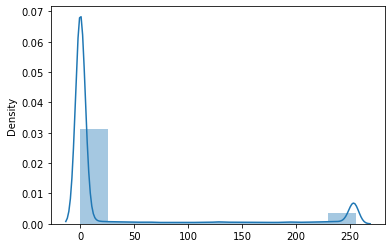

In [8]:
# Exploring all the variables as all are numerical

sns.distplot(letter_data, hist= True, kde = True, bins = 10)

In [9]:
cols = letter_data.iloc[:, 0:].values


<AxesSubplot:xlabel='label', ylabel='count'>

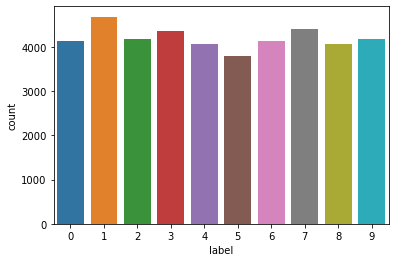

In [10]:
sns.countplot(x ='label', data = letter_data)

In [11]:
# Value counts of the above graph to understand which label had the highest data entries

letter_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:>

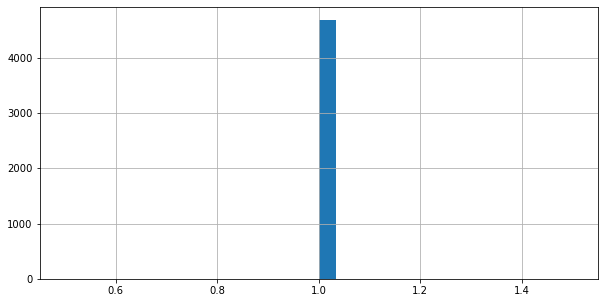

In [12]:
# Zooming in on label 1 as it has the highest values

label_1 = letter_data.loc[(letter_data["label"] == 1)]

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
label_1["label"].hist(bins=30, ax = ax)


# Analysis

In [13]:
# Nearest neighbor approach (KNN model)

# Splitting dependent and indepdendant variable

y = letter_data[['label']]
X = letter_data.drop('label',axis=1)

In [14]:
# Divide into train and test set into 80:20 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [15]:
# Scaling the data training data for better results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Knn with K=3

from sklearn.neighbors import KNeighborsClassifier
classifier_3= KNeighborsClassifier(n_neighbors = 3)
classifier_3.fit(X_train, y_train)

/Users/gina/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred_3 = classifier_3.predict(X_test)

In [18]:
classifier_3.score(X_test,y_test)
print('Accuracy of Knn classifier on test set: {:.2f}'.format(classifier_3.score(X_test, y_test)*100),'%')

Accuracy of Knn classifier on test set: 61.43 %


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       762
           1       0.73      0.94      0.82       923
           2       0.55      0.61      0.58       840
           3       0.49      0.52      0.51       868
           4       0.54      0.56      0.55       815
           5       0.60      0.56      0.58       746
           6       0.83      0.85      0.84       847
           7       0.48      0.42      0.45       887
           8       0.65      0.43      0.52       847
           9       0.46      0.38      0.42       865

    accuracy                           0.61      8400
   macro avg       0.61      0.61      0.61      8400
weighted avg       0.61      0.61      0.61      8400



In [20]:
# Neural Network

y = letter_data[['label']]
X = letter_data.drop('label',axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Scaling the data training data for better results
unscaled_features = X_train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_array = sc.fit_transform(X_train)


In [22]:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns) 
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

/Users/gina/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron

mlp = MLPClassifier(3,activation="relu",solver='sgd',learning_rate_init= 0.01, max_iter=100, random_state=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mlp.score(X_test,y_test)

print('Accuracy of Neural network model on test set: {:.2f}'.format(mlp.score(X_test, y_test)*100),'%')

/Users/gina/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Neural network model on test set: 51.20 %


/Users/gina/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68       802
           1       0.65      0.89      0.75       921
           2       0.46      0.29      0.35       885
           3       0.43      0.59      0.50       895
           4       0.45      0.30      0.36       799
           5       0.42      0.40      0.41       767
           6       0.75      0.70      0.72       837
           7       0.44      0.32      0.37       882
           8       0.52      0.28      0.37       759
           9       0.36      0.53      0.43       853

    accuracy                           0.51      8400
   macro avg       0.51      0.51      0.49      8400
weighted avg       0.51      0.51      0.50      8400



In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbclass=GradientBoostingClassifier(random_state=0)
gbclass.fit(X_train,y_train)
gbypred=gbclass.predict(X_test)

gbclass.score(X_test, y_test)

print(classification_report(y_test, gbypred))
print('Accuracy of Gradient Boost model on test set: {:.2f}'.format(gbclass.score(X_test, y_test)*100),'%')

/Users/gina/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       802
           1       0.76      0.94      0.84       921
           2       0.76      0.61      0.68       885
           3       0.67      0.58      0.62       895
           4       0.73      0.57      0.64       799
           5       0.66      0.62      0.64       767
           6       0.86      0.89      0.87       837
           7       0.50      0.66      0.57       882
           8       0.60      0.55      0.57       759
           9       0.49      0.49      0.49       853

    accuracy                           0.68      8400
   macro avg       0.69      0.68      0.68      8400
weighted avg       0.69      0.68      0.68      8400

Accuracy of Gradient Boost model on test set: 68.21 %
